In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.corpus import opinion_lexicon

#nltk.download('popular')   #popular, all-nltk

In [ ]:
positive_words = opinion_lexicon.positive()
negative_words = opinion_lexicon.negative()
print(len(positive_words), len(negative_words))
print(positive_words)
print(negative_words)

2006 4783
['a+', 'abound', 'abounds', 'abundance', 'abundant', ...]
['2-faced', '2-faces', 'abnormal', 'abolish', ...]


In [6]:
stop_words = stopwords.words('english')

<Figure size 1400x600 with 0 Axes>

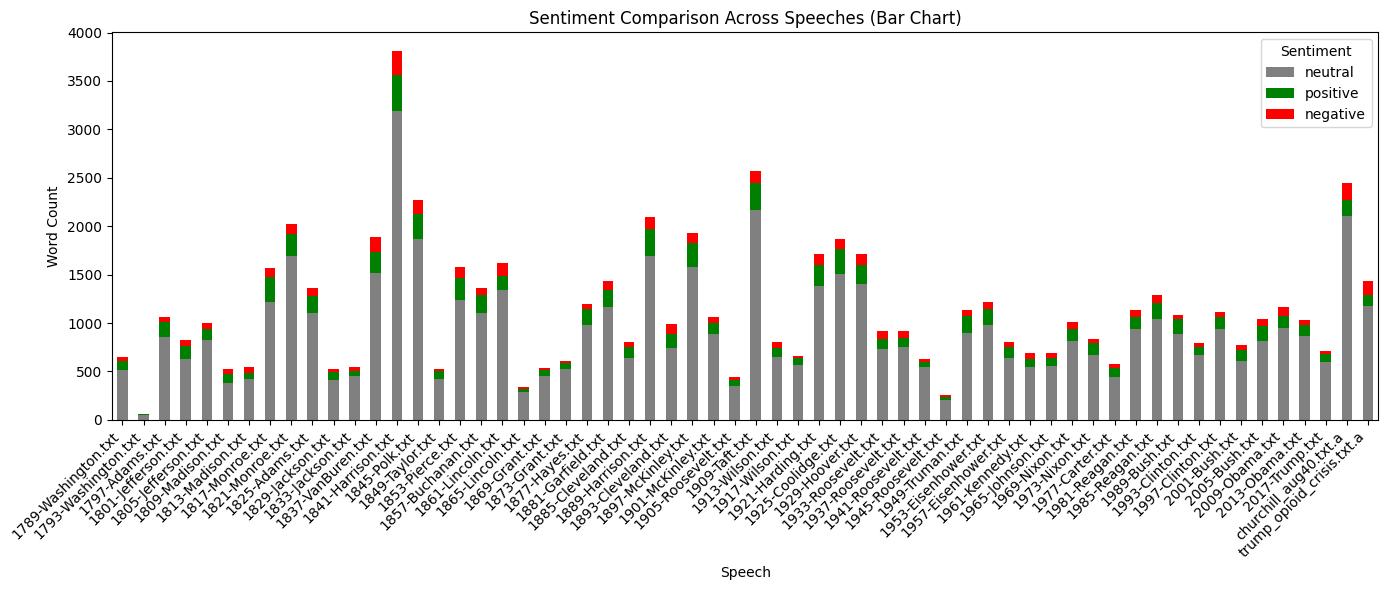

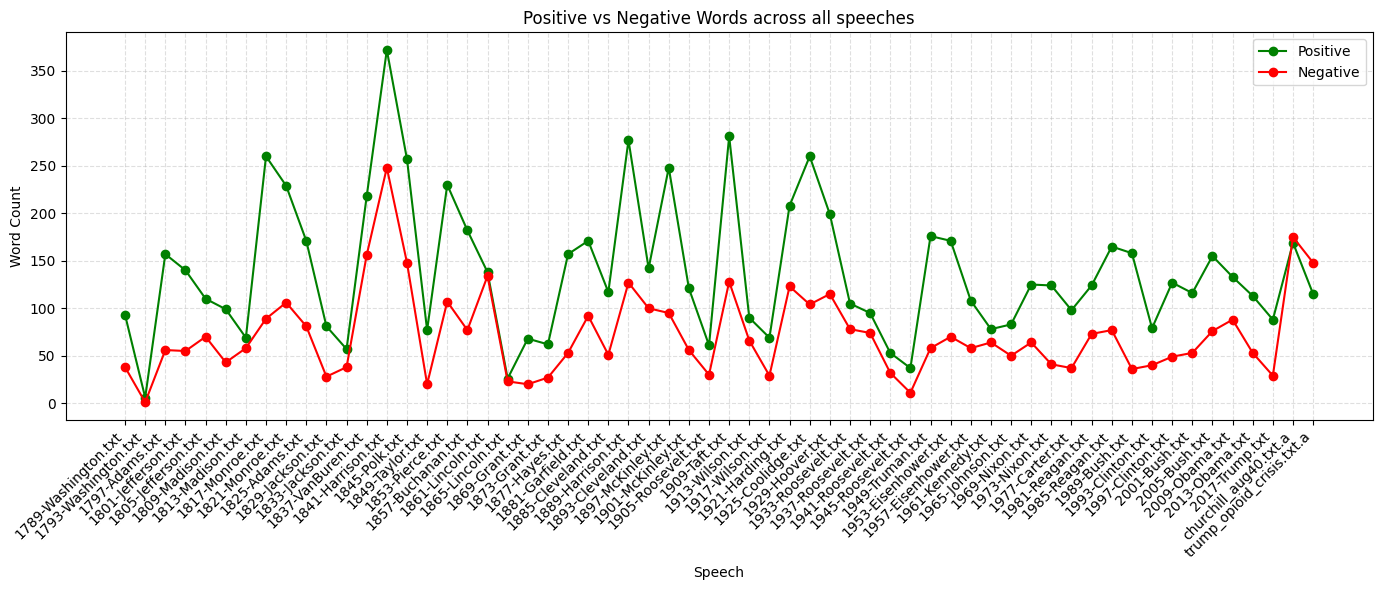

,speech,positive,negative,neutral,total
0,1789-Washington.txt,93,38,517,648
1,1793-Washington.txt,6,1,53,60
2,1797-Adams.txt,157,56,853,1066
3,1801-Jefferson.txt,140,55,625,820
4,1805-Jefferson.txt,110,70,825,1005
5,1809-Madison.txt,99,43,380,522
6,1813-Madison.txt,69,58,419,546
7,1817-Monroe.txt,260,89,1217,1566
8,1821-Monroe.txt,229,106,1692,2027
9,1825-Adams.txt,171,81,1106,1358


In [ ]:
import re
import os
import nltk
from nltk.corpus import stopwords, opinion_lexicon
from nltk.stem import WordNetLemmatizer

# Ensure NLTK data is available
#nltk.download("stopwords")
#nltk.download("opinion_lexicon")
#nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())


def analyse_text(text):

    # 1. Clean text
    text = re.sub(r"[^\w\s]+|\s+", " ", text).strip()

    # 2. Tokenise and keep only alphabetical tokens
    tokens = [tok.lower() for tok in text.split() if tok.isalpha()]
    #print(f"Original token count: {len(tokens)}")

    # 3. Remove stopwords
    ctokens = [tok for tok in tokens if tok not in stop_words]
    #print(f"After stopword removal: {len(ctokens)} tokens")

    # 4. Lemmatize
    lemmatiser = WordNetLemmatizer()
    ctokens = [lemmatiser.lemmatize(tok) for tok in ctokens]
    #print(f"After lemmatization: {len(ctokens)} tokens")

    # 5. Sentiment classification
    countpositive = countnegative = countneutral = 0

    sentiment_labels = []

    for tok in ctokens:
        if tok in positive_words:
            sentiment_labels.append((tok, "POS"))
            countpositive += 1
        elif tok in negative_words:
            sentiment_labels.append((tok, "NEG"))
            countnegative += 1
        else:
            sentiment_labels.append((tok, "NEUTRAL"))
            countneutral += 1

    counttotal = len(ctokens)

    #print("\nSentiment counts:")
    #print(f"Positive: {countpositive}")
    #print(f"Negative: {countnegative}")
    #print(f"Neutral : {countneutral}")
    #print(f"Total   : {counttotal}")

    #6. Show first 20 tagged tokens
    #print("\nFirst 20 tokens with sentiment:")
    #for tok, tag in sentiment_labels[:20]:
    #    print(f"{tok:15}  {tag}")

    return countpositive, countnegative, countneutral, counttotal

def analyse_all_speeches(folder):

    results = []

    # ---- Loop through speeches/ folder ----
    for filename in os.listdir(folder):
        if filename.endswith(".txt") or filename.endswith(".a"):
            path = os.path.join(folder, filename)

            with open(path, encoding="latin-1") as f:
                text = f.read()

            pos, neg, neu, total = analyse_text(text)

            results.append({
                "speech": filename,
                "positive": pos,
                "negative": neg,
                "neutral": neu,
                "total": total
            })

    # ---- Convert to DataFrame ----
    df = pd.DataFrame(results)
    df_plot = df.set_index("speech")[["neutral", "positive", "negative"]]

    # =============================================
    #  sentiment distribution (bar)
    # =============================================
    plt.figure(figsize=(14, 6))
    df_plot.plot(
        kind="bar",
        stacked=True,
        color=["gray", "green", "red"],
        figsize=(14, 6)
    )

    plt.title("Sentiment Comparison Across Speeches (Bar Chart)")
    plt.ylabel("Word Count")
    plt.xlabel("Speech")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()

    # ============================================
    #  positive vs negative comparison (line)
    # ============================================
    plt.figure(figsize=(14, 6))

    plt.plot(df["speech"], df["positive"], marker='o', label="Positive", color="green")
    plt.plot(df["speech"], df["negative"], marker='o', label="Negative", color="red")

    plt.title("Positive vs Negative Words across all speeches")
    plt.ylabel("Word Count")
    plt.xlabel("Speech")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    #return df   #return if required

analyse_all_speeches("speeches/")